## Kütüphaneleri İçe Aktarma:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


# Grafiklerin doğrudan not defterinde gösterilmesini sağlar
%matplotlib inline

# Uyarıları yok say
import warnings
warnings.filterwarnings("ignore")


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Veri Setlerinin Yüklenmesi
</h2>
Aşağıdaki kod, iki farklı CSV dosyasını okuyarak eğitim ve test veri setlerini yükler:
</font>

In [2]:
train = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\test_lAUu6dG.csv")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Eğitim Veri Setindeki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, eğitim veri setindeki eksik (NaN) değerleri, her sütunun mod (en sık görülen değer) ile doldurur:
</font>

In [3]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace = True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Test Veri Setindeki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, test veri setindeki eksik (NaN) değerleri, her sütunun mod (en sık görülen değer) ile doldurur:
</font>

In [4]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace = True)
test["Married"].fillna(test["Married"].mode()[0], inplace = True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace = True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace = True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Loan_Amount_Term Sütunundaki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, hem eğitim (<strong>train</strong>) hem de test (<strong>test</strong>) veri setlerinde, <strong>Loan_Amount_Term</strong> sütunundaki eksik (<strong>NaN</strong>) değerleri en sık görülen değer (<strong>mod</strong>) ile doldurur:
</font>

In [5]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
LoanAmount Sütunundaki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, hem eğitim (<strong>train</strong>) hem de test (<strong>test</strong>) veri setlerinde, <strong>LoanAmount</strong> sütunundaki eksik (<strong>NaN</strong>) değerleri sütunun <strong>medyan</strong> değeriyle doldurur:
</font>

In [6]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace = True)

In [7]:
# Total Income hesaplama
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_Income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

In [8]:
# Logarithmic Total Income hesaplama
train["Total_Income_log"] = np.log(train["Total_Income"])
test["Total_Income_log"] = np.log(test["Total_Income"])

In [9]:
# EMI hesaplama
train["EMI"] = train["LoanAmount"] / train["Loan_Amount_Term"]
test["EMI"] = test["LoanAmount"] / test["Loan_Amount_Term"]

In [10]:
# Balance Income hesaplama
train["Balance_Income"] = train["Total_Income"] - (train["EMI"] * 1000)
test["Balance_Income"] = test["Total_Income"] - (test["EMI"] * 1000)

In [11]:
train = train.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis = 1)
test = test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis = 1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

test_id = test["Loan_ID"]

# "Loan_ID" kolonunu kaldır
train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID", axis=1)

X = train.drop("Loan_Status", axis=1)
y = train.Loan_Status

# Eğitim setindeki kategorik sütunları belirleyin ve One-Hot Encoding uygulayın
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Test setindeki kategorik sütunları belirleyin ve One-Hot Encoding uygulayın
test_categorical_cols = test.select_dtypes(include=['object']).columns
test = pd.get_dummies(test, columns=test_categorical_cols, drop_first=True)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
paramgrid = {"max_dept": list(range(1,20,2)), "n_estimators": list(range(1,200, 20))}

In [15]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model tanımı
estimator = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion="gini",
    max_depth=None,
    max_features="auto",
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=10,
    n_jobs=1,
    oob_score=False,
    random_state=1,
    verbose=0,
    warm_start=False
)

# Parametre grid
param_grid = {
    "max_depth": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    "n_estimators": [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]
}

# GridSearchCV tanımı
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring=None,
    n_jobs=1,
    cv=None,
    refit=True,
    verbose=0,
    error_score="raise",
    pre_dispatch="2*n_jobs",
    return_train_score=True
)


In [19]:
# K-Fold Cross Validation
i = 1

# StratifiedKFold tanımı
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print("\n{} of kfold {}".format(i,kf.n_splits))

    # Eğitim ve test veri setlerini ayır
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    # Modeli eğit
    model = RandomForestClassifier(random_state=1, max_depth= 3, n_estimators= 41)
    model.fit(xtr, ytr)

    # Doğrulama setinde tahmin yap
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print(f"Accuracy Score for Fold {i}: {score}")

    i += 1

# Test setinde tahmin yap
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score for Fold 1: 0.8211382113821138

2 of kfold 5
Accuracy Score for Fold 2: 0.8373983739837398

3 of kfold 5
Accuracy Score for Fold 3: 0.8048780487804879

4 of kfold 5
Accuracy Score for Fold 4: 0.7723577235772358

5 of kfold 5
Accuracy Score for Fold 5: 0.7950819672131147


In [20]:
# Boş bir DataFrame oluşturuyoruz
submission = pd.DataFrame()
# Loan_ID sütununu ekliyoruz
submission['Loan_ID'] = test_id
# Loan_Status sütununu ekliyoruz
submission['Loan_Status'] = pred_test

In [21]:
pd.DataFrame(submission, columns = ["Loan_ID", "Loan_Status"]).to_csv("R.csv")

<Axes: >

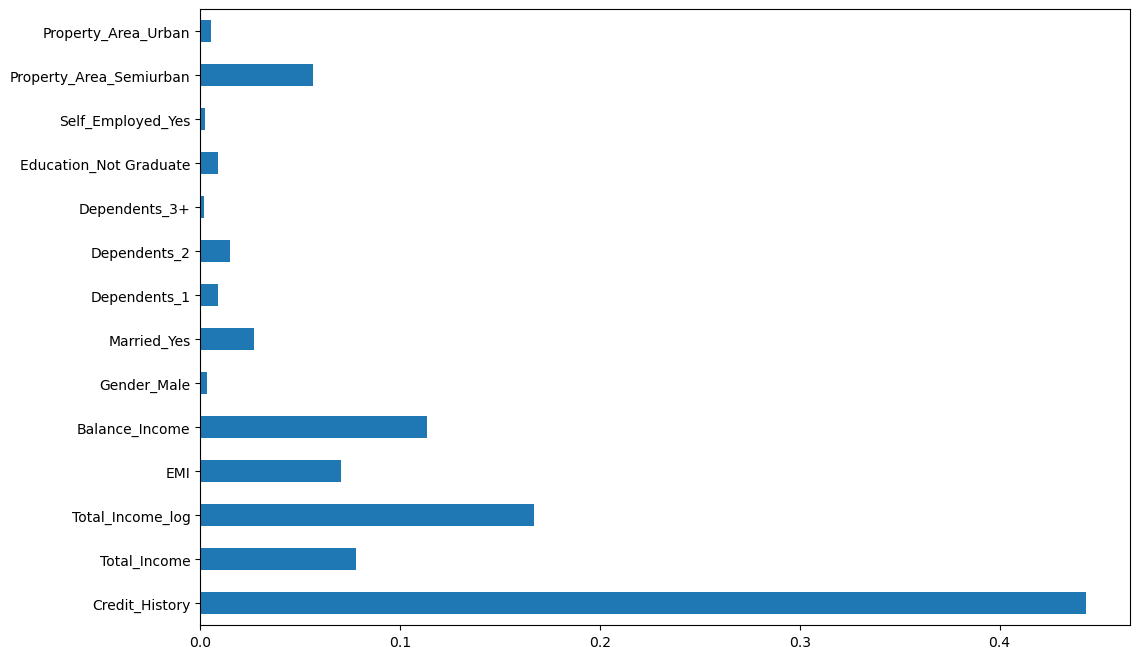

In [22]:
importances = pd.Series(model.feature_importances_, index= X.columns)
importances.plot(kind = "barh", figsize = (12,8))